In [ ]:
from keras.datasets import mnist

In [ ]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
xtrain.shape

(60000, 28, 28)

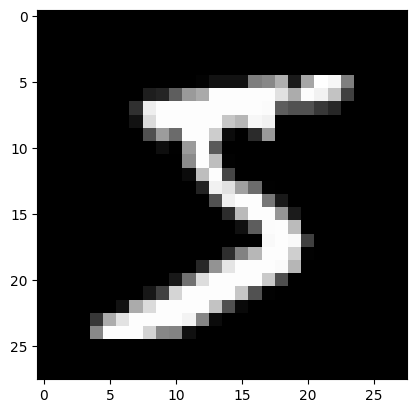

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[0],cmap='gray')
plt.show()

In [ ]:
import seaborn as sns

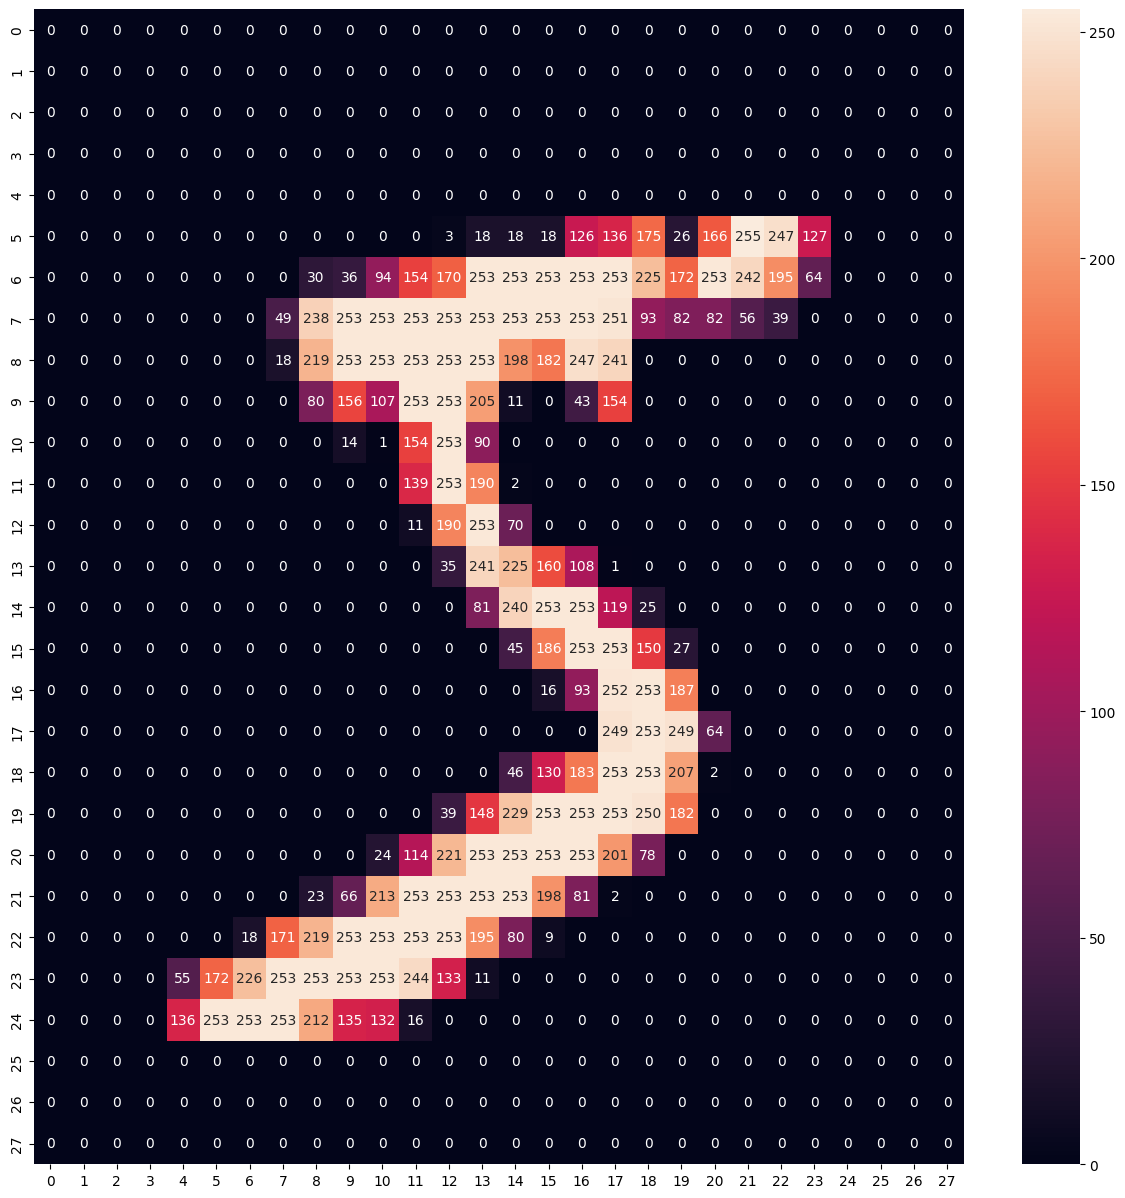

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(xtrain[0],annot=True,fmt='d')
plt.show()

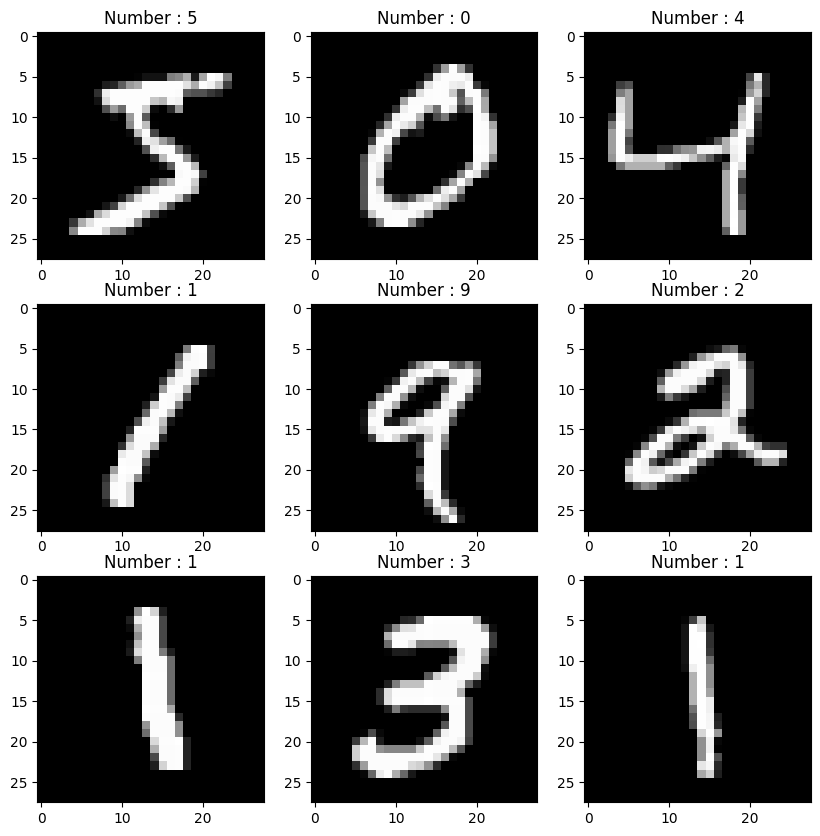

In [ ]:
plt.figure(figsize=(10,10))

for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(xtrain[i], cmap='gray')
  plt.title(f'Number : {ytrain[i]}')

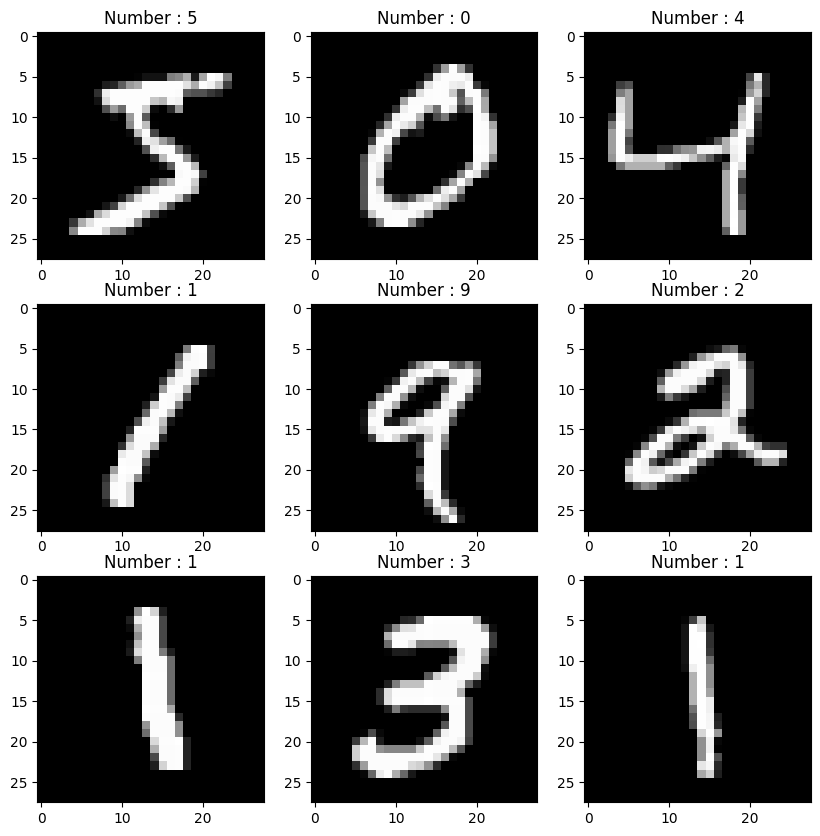

In [ ]:
plt.figure(figsize=(10,10))

for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(xtrain[i], cmap='gray')
  plt.title(f'Number : {ytrain[i]}')

In [ ]:
xtrain_scl=xtrain.astype('float32')/255
xtrain_scl=xtest.astype('float32')/255

In [ ]:
import numpy as np

In [ ]:
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
from keras.utils import to_categorical
ytrain_cat=to_categorical(ytrain)
ytest_cat=to_categorical(ytest)

In [ ]:
ytrain_cat[0:3]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [ ]:
ytrain[0:3]

array([5, 0, 4], dtype=uint8)

In [ ]:
from keras.models import Sequential
from keras.layers import Input,Convolution2D , MaxPool2D , Flatten , Dropout , Dense

In [ ]:
# initialize the model
model = Sequential()

# Add input layer
model.add(Input(shape=(28,28,1)))

# Add Convolution layer 1
model.add(Convolution2D(filters=32 , activation = 'relu' , kernel_size=(3,3)))
# we dont have to worry about the values in filter matrix


# Add max pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

# Add convolution layer 2
model.add(Convolution2D(filters=64, activation='relu', kernel_size=(3,3)))

# Add Max Pooling layer 2.

In [ ]:
from keras.models import Sequential
from keras.layers import Input,Convolution2D , MaxPool2D , Flatten , Dropout , Dense

# initialize the model
model = Sequential()

# Add input layer
model.add(Input(shape=(28,28,1)))

# Add Convolution layer 1
model.add(Convolution2D(filters=32 , activation = 'relu' , kernel_size=(3,3)))
# we dont have to worry about the values in filter matrix


# Add max pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

# Add convolution layer 2
model.add(Convolution2D(filters=64, activation='relu', kernel_size=(3,3)))

# Add Max Pooling layer 2.
model.add(MaxPool2D(pool_size=(2,2 )))

# Add a flatten layer
model.add(Flatten())

# Add a dropout layer
model.add(Dropout(0.5))

# Create a output layer
model.add(Dense(units=ytrain_cat.shape[1], activation='softmax'))

In [ ]:
model.compile(optimizer='adam' ,loss='categorical_crossentropy' , metrics=['accuracy'])

In [ ]:
hist = model.fit(xtrain,ytrain_cat, validation_split=0.2, epochs =15)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7962 - loss: 1.6672 - val_accuracy: 0.9768 - val_loss: 0.0785
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9542 - loss: 0.1532 - val_accuracy: 0.9828 - val_loss: 0.0587
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9646 - loss: 0.1170 - val_accuracy: 0.9811 - val_loss: 0.0605
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9691 - loss: 0.1002 - val_accuracy: 0.9844 - val_loss: 0.0577
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9723 - loss: 0.0930 - val_accuracy: 0.9859 - val_loss: 0.0497
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9763 - loss: 0.0793 - val_accuracy: 0.9862 - val_loss: 0.0475
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9782 - loss: 0.0720 - val_accuracy: 0.9887 - val_loss: 0.0460
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9790 - loss: 0.0689

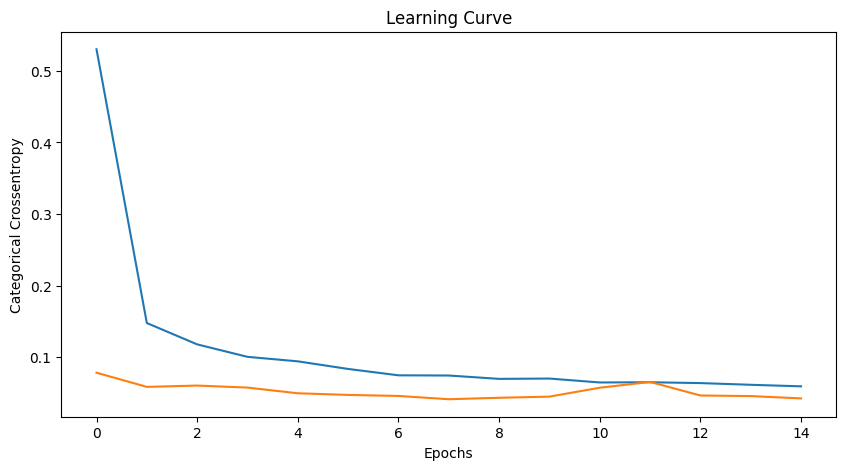

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(hist.history['loss'],label='Train loss')
plt.plot(hist.history['val_loss'] , label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Crossentropy')
plt.title('Learning Curve')
plt.show()

In [ ]:
yprob_train = model.predict(xtrain)
yprob_test = model.predict(xtest)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
ypred_train = np.argmax(yprob_train, axis=1)
ypred_test = np.argmax(yprob_test,axis=1)

In [ ]:
ypred_train = np.argmax(yprob_train, axis=1)
ypred_test = np.argmax(yprob_test,axis=1)

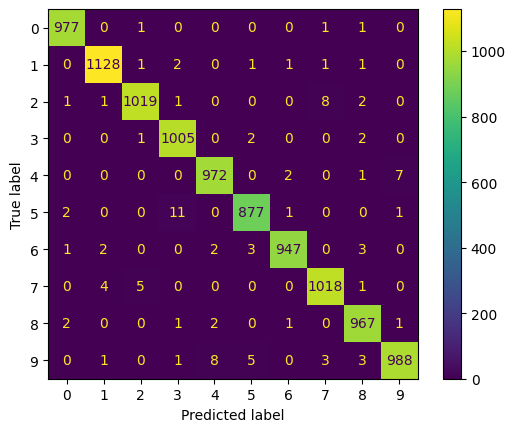

In [ ]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
cf= confusion_matrix(ytest , ypred_test)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()